### 1. Ïä§Ìã∞Ïª§ & ÏÇ¨ÏßÑ Ï§ÄÎπÑ

ÏôÑÎ£å!

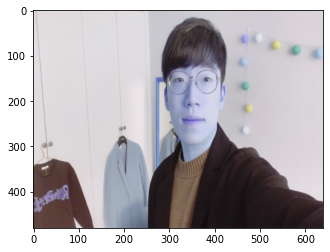

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

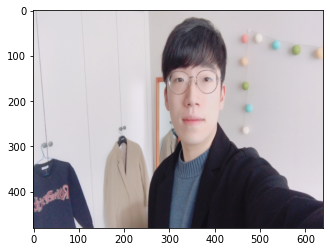

In [53]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 2. ÏñºÍµ¥ Í≤ÄÏ∂ú Î∞è ÎûúÎìúÎßàÌÅ¨

#### 2-1. ÏñºÍµ¥ Í≤ÄÏ∂ú

rectangles[[(276, 128) (425, 277)]]


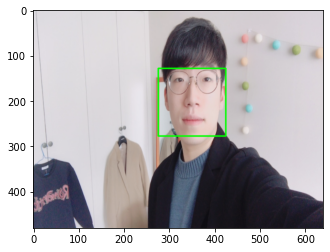

In [54]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 5)   #- (image, num of img pyramid)

print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 2-2. ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨

In [55]:
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [56]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


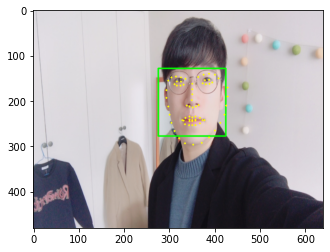

In [57]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞
Î≥ºÏùÄ 'ÌÑ±', 'Îàà', 'ÏûÖ', 'ÏΩî' ÏÇ¨Ïù¥Ïóê ÏûàÎã§Îäî Ï†êÏùÑ Ïù¥Ïö©Ìï¥ Ï£ºÏÑ∏Ïöî. ÎπÑÏú®Î°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ï ÏûäÏßÄ ÏïäÏúºÏÖ®Ï£†?

[hint] 2, 36, 48, 30 Î≤à Ïù∏Îç±Ïä§Î•º Ïù¥Ïö©

In [58]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 198)
(x,y) : (350,198)
(w,h) : (150,150)


In [59]:
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(150, 150, 3)


In [60]:
refined_x = x - w // 2  # left
refined_y = y - h//2   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (275,123)


### 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

#### 4-1. np.where Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï¥ Ï£ºÏÑ∏Ïöî.

In [61]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

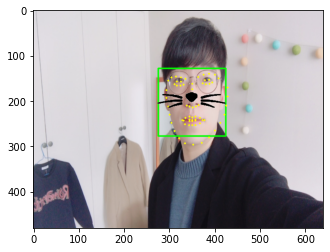

In [62]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

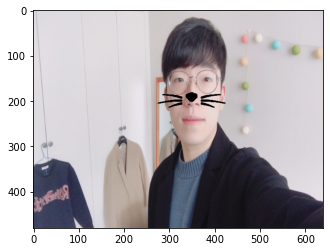

In [65]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

(x,y) : (418,491)
(w,h) : (268,268)
(x,y) : (284,357)
(x,y) : (284,357)
(268, 268, 3)


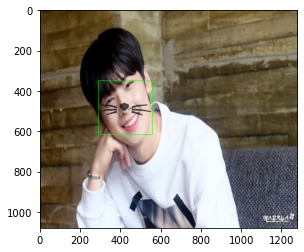

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image4.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
# plt.imshow(img_bgr)
# plt.show()
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()
# hog detectorÎ•º ÏÑ†Ïñ∏
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
# print("üå´:flying_saucer:")
# detectorÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
# print("üå´:flying_saucer:")
# print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# print("üå´:flying_saucer:")
# landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôò

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
# for landmark in list_landmarks:
#     for idx, point in enumerate(list_points):
#         cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
# Ïä§Ìã∞Ïª§ ÏùΩÏñ¥ÏÑú Ï†ÅÏö©
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º w,h Ïóê ÎßûÏ∂∞ ÏàòÏ†ï
# print (img_sticker.shape)
# x,y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î≤îÏúÑ Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂Ñ Ï†úÍ±∞
# # -y ÌÅ¨Í∏∞ÎßåÌÅº Ïä§Ìã∞ÌÑ∞ crop
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)
# top Ïùò y Ï¢åÌëúÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÏàòÏ†ï
# refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape)
# print(img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]])
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ï†ÅÏö©


sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
# # bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
# sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
# plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
# plt.show()

#### 4-2. Ïä§Ìã∞Ïª§Î•º Ï°∞Í∏à Îçî ÏûêÏó∞Ïä§ÎüΩÍ≤å Î≥¥Ïù¥Í≤å ÌïòÎ†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†ÍπåÏöî? Ïä§Ìã∞Ïª§ Îí§Î°ú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∞ôÏù¥ Î≥¥Ïù¥ÎèÑÎ°ù ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§.
[hint] opencv Ïùò cv2.addWeighted() Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.

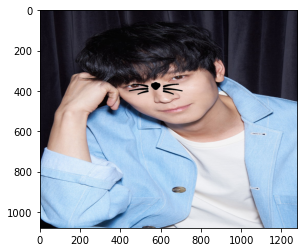

In [102]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 5. Î¨∏Ï†úÏ†ê Ï∞æÏïÑÎ≥¥Í∏∞
#### 5-1. ÏÖÄÌîÑ Ïπ¥Î©îÎùºÎ•º Îã§ÏñëÌïú Í∞ÅÎèÑÏóêÏÑú Ï¥¨ÏòÅÌïòÎ©¥ÏÑú Ïä§Ìã∞Ïª§Î•º Î∞òÎ≥µÌï¥ÏÑú Ï†ÅÏö©Ìï¥ Î≥¥ÏÑ∏Ïöî.

68


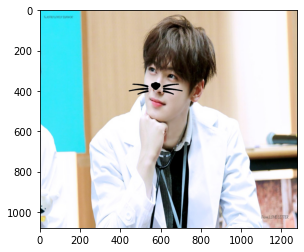

In [95]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image5.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# Ïä§Ìã∞Ïª§ ÏùΩÏñ¥ÏÑú Ï†ÅÏö©
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º w,h Ïóê ÎßûÏ∂∞ ÏàòÏ†ï
# print (img_sticker.shape)
# x,y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

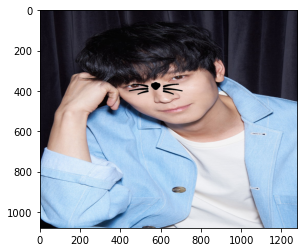

In [101]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# Ïä§Ìã∞Ïª§ ÏùΩÏñ¥ÏÑú Ï†ÅÏö©
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º w,h Ïóê ÎßûÏ∂∞ ÏàòÏ†ï
# print (img_sticker.shape)
# x,y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

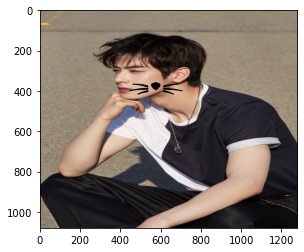

In [103]:
my_image_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/image6.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (1280, 1080))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr -> rgb
dlib_rects = detector_hog(img_rgb, 2)   #- (image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()
import os
model_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
#     print ('(x,y) : (%d,%d)'%(x,y))
#     print ('(w,h) : (%d,%d)'%(w,h))
# Ïä§Ìã∞Ïª§ ÏùΩÏñ¥ÏÑú Ï†ÅÏö©
import os
sticker_path = os.getenv('HOME')+'/workplace/aiffel/Exploration/10.camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º w,h Ïóê ÎßûÏ∂∞ ÏàòÏ†ï
# print (img_sticker.shape)
# x,y Ï¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# print(img_sticker.shape)


# sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0)
# plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
# plt.show()
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢Ö Í≤∞Í≥ºÎßå Ï∂úÎ†•
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 5-2. Î¨∏Ï†úÏ†êÏù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏµúÎåÄÌïú ÏûêÏÑ∏ÌïòÍ≤å Í∏∞Î°ùÌï¥ Î≥¥ÏÑ∏Ïöî. Ïó¨Îü¨Î∂ÑÏù¥ ÏÉùÍ∞ÅÌïú Î¨∏Ï†úÏ†êÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ïÏùÄ Î∂ÑÎ™Ö Ï°¥Ïû¨Ìï©ÎãàÎã§!

#### Î¨∏Ï†ú
- ÏñºÍµ¥Ïùò ÌïúÏ™Ω Ï∏°Î©¥Îßå Î≥¥Ïó¨Ï£ºÎ©¥ ÏñºÍµ¥Î°ú Ïù∏ÏãùÏùÑ Î™ªÌïúÎã§.
    - ÏñºÍµ¥ ÏúÑÏùò Ï†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏûëÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏñºÍµ¥ Ï†ÑÏ≤¥Í∞Ä ÎÇòÏïÑÏïºÎßå ÌïúÎã§.
    - ÎåÄÎ∂ÄÎ∂ÑÏùò ÏñºÍµ¥ ÌïÑÌÑ∞ Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏóêÏÑúÎèÑ ÎèôÏùºÌïòÍ≤å Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÏù∏Îç∞ ÎãπÏó∞ÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.
- Ìï¥ÏÉÅÎèÑÍ∞Ä ÎÇÆÏùÑ Ïãú detector Í∞Ä ÏûëÎèôÌïòÏßÄ ÏïäÎäîÎã§.
    - Ìï¥ÏÉÅÎèÑÎ•º ÎÜíÏù∏Îã§.
    - ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï¶ùÍ∞Ä
- Ïä§Ìã∞Ïª§Í∞Ä ÏñºÍµ¥ Í∞ÅÎèÑÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÎäîÎã§. 
    - ÌöåÏ†Ñ Ìï®Ïàò cv2.getRotationMatrix2D()ÏùÑ Ïù¥Ïö©ÌïúÎã§.
- Ï£ºÎ≥Ä ÌôòÍ≤Ω ÏÉâÍ≥º ÏÇ¨ÎûåÏù¥ Í≤πÏπòÎ©¥ ÏûëÎèôÌïòÏßÄ ÏïäÎäîÎã§.

### ÌèâÍ∞Ä

- Í≥†ÏñëÏù¥ ÏàòÏóºÏù¥ ÎÖ∏ÎûÄÏÉâÏúºÎ°ú Î≥ÄÌïúÎã§.
    - img_sticker==1 Î°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏóàÎçîÎãà Í≤ÄÏùÄÏÉâÏúºÎ°ú Î∞îÎÄåÏóàÎã§.
- ÏàòÏóº Î∞∞Í≤ΩÏù¥ Í≥ÑÏÜç Ìù∞ÏÉâÏù¥Îã§.
    - img_sticker==255 Î°ú Î≥ÄÍ≤ΩÌñàÎã§.
- Í≥†ÏñëÏù¥ ÏàòÏóºÏù¥ ÎÇ¥Î†§Ïò§ÏßÄ ÏïäÎäîÎã§.
    - ÏΩîÏùò ÏúÑÏπò landmark[30] Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÇºÏïÑ xÏôÄ y Ï¢åÌëúÎ•º Í∞ÅÍ∞Å refined_x = x - w // 2, refined_y = y - h // 2 ÏúºÎ°ú ÏàòÏ†ïÌï¥Ï£ºÏóàÎã§.
    - ÏôïÍ¥Ä ÏòàÏãúÏôÄ Îã¨Î¶¨ ÏûòÎ¶¨Îäî Î∂ÄÎ∂ÑÏùÑ Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏñ¥ refined_yÎ•º 0ÏúºÎ°ú ÏßÄÏ†ïÌï† Ïù¥Ïú†Í∞Ä ÏóÜÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ≠Ï†úÌñàÎã§.
    - sticker area ÏôÄ img_show, img_bgr Ïùò y Î≤îÏúÑÎ•º [refined_y:refined_y+img_sticker.shape[0]] Î°ú ÏàòÏ†ïÌñàÎã§.
- dst = cv2.addWeighted(img_bgr, 0.3, img_show, 0.7, 0) ÏóêÏÑú ÏÇ¨ÏßÑ Îëê Ïû•Ïùò ÏïåÌåå Í∞íÏù¥ 1Ïù¥ ÎêòÏñ¥Ïïº ÌïúÎã§.

#### Ïù¥Î†áÍ≤å Í∏ÄÎ°úÎßå Ï†ÅÏúºÎãà Î≥Ñ Î¨∏Ï†ú ÏóÜÏóàÎçò Í≤É Í∞ôÏßÄÎßå ÏàòÏóº Î∞∞Í≤ΩÏÉâÍ≥º Í≥†ÏñëÏù¥ ÏàòÏóº ÏúÑÏπò ÎïåÎ¨∏Ïóê ÌïòÎ£® Ï¢ÖÏùºÏùÑ Ìà¨ÏûêÌï¥ÏïºÎßå ÌñàÎã§. ÏΩîÎìúÎ•º Ìï¥ÏÑùÌïòÎäî Îä•Î†•ÏùÑ Ï¢Ä Îçî ÌÇ§ÏõåÏïºÍ≤†Îã§.